In [6]:
import sys 
import os 
sys.path.append(os.path.abspath("../"))
from src.Limma import batchEffectCorrection
from src.MetNormalizer import MetNorm
from utils.utility_functions import pca_plot
import pandas as pd

removing blanks
returning accepted signals


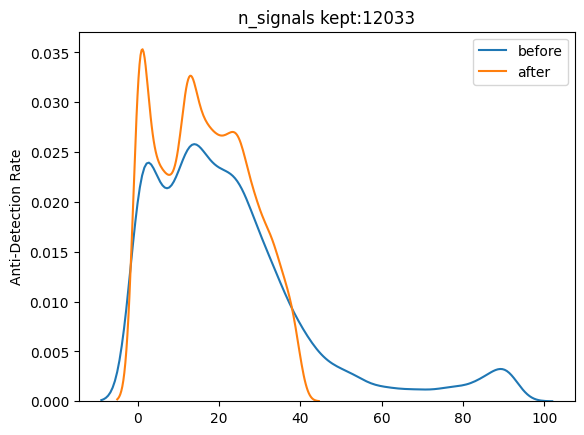

In [60]:
D = pd.read_csv("Data/2-peak_area_after_filling_missing_values.csv").set_index("position").drop(columns=['mz','rt','name']).T
M = pd.read_csv("Data/sample_metadata_all_batches.csv").set_index("sample_name")
D = D[~D.index.str.contains("_B_")]
M = M[~M.index.str.contains("_B_")]
D = D.drop(index='AOU_S_0104')
M = M.drop(index='AOU_S_0104')
D = D[detection(D,limit=0.40).index]
D = TIC(D,scale=True)
D = np.log2(D)

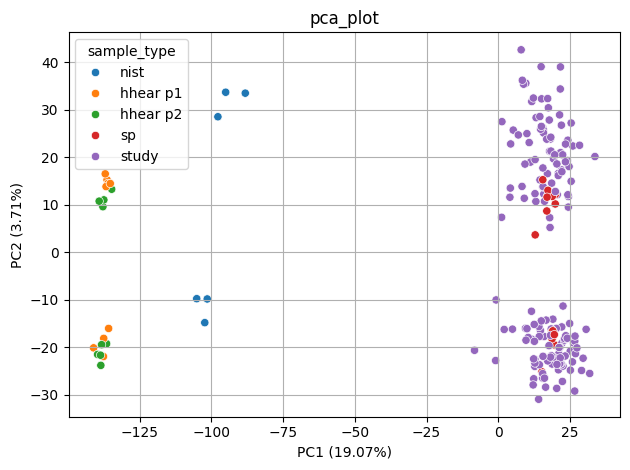

In [61]:
pca_plot(D,M)

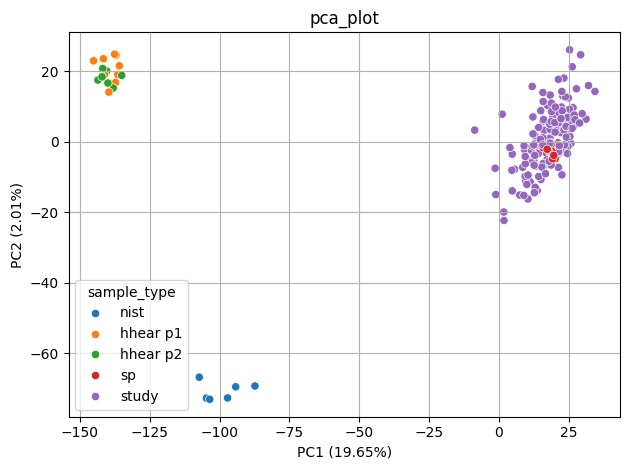

In [62]:
batch = M.loc[D.index,'batch']
combat = pycombat_norm(D.T,batch).T
pca_plot(combat,M)

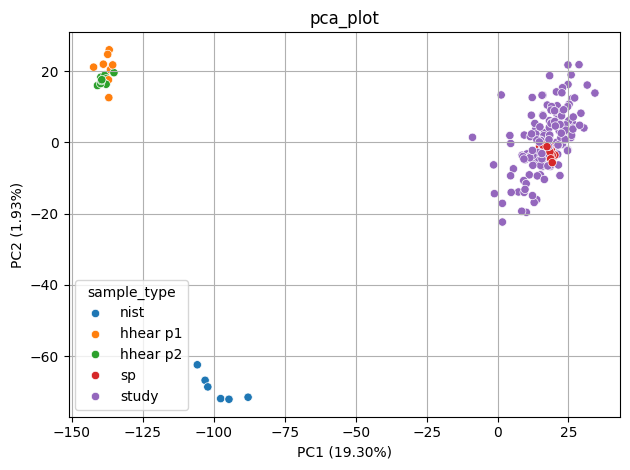

In [63]:
limma = batchEffectCorrection(D.T,M)
pca_plot(limma,M,hue='sample_type')

In [81]:
limmar = pd.read_csv("Data/limma_ref.csv").rename(columns={"Unnamed: 0":"name"}).set_index("name").T

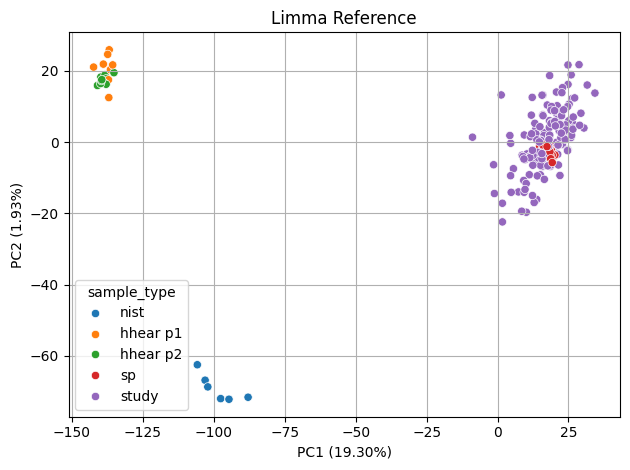

In [82]:
pca_plot(limmar,M,title='Limma Reference')

## MetNormalizer 

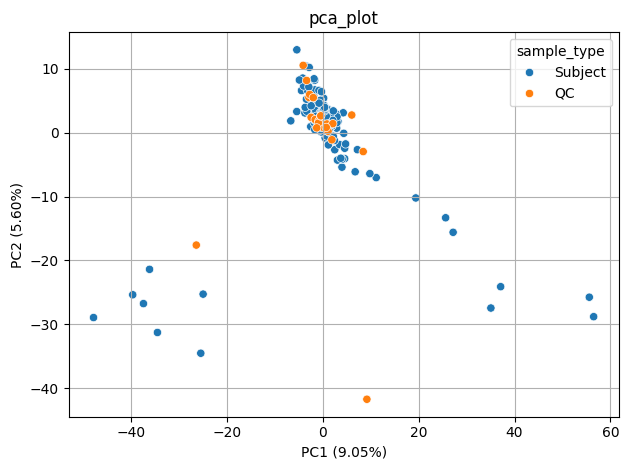

S20            S30            S39            S49  \
name                                                               
1     554201.414588  604294.667793  584520.817661  527564.572646   
2      98054.509668  111595.914806  102747.151652  110718.613910   
3      33791.434824   34713.886967   35005.951154   35541.962102   
4     159582.501541  154719.722934  157859.942672  161362.000040   
5      66743.557613   85894.062717   74709.185283   77697.046849   
...             ...            ...            ...            ...   
1347   22822.345318   22705.121847   22008.539660   20838.126470   
1348   14267.821974   13078.249453   11149.434855   12738.379783   
1349    9196.167797    9132.867284    8877.524617    8621.931116   
1350   22873.969868   19743.175450   20433.169472   19601.214469   
1351   23185.038029   22927.780617   25308.718884   22865.796991   

                S59            S69            S78             S2  \
name                                                               
1     553538.556746  552310.232612  550577.776329  562930.193384   
2     104026.682137   96565.676791  101562.621700   94391.244331   
3      34846.384256   34683.880245   36115.088502   34674.666783   
4     154541.320093  158790.450556  157610.566349  156861.222205   
5      69381.596065   65140.725482   65892.837606   63410.679178   
...             ...            ...            ...            ...   
1347   22971.345388   22964.061141   22044.205861   22219.826851   
1348   13354.137829   11624.511702   12637.566405   11970.705024   
1349    8517.783716    7925.457705    7613.487241    8404.158692   
1350   20495.913026   20289.334860   19402.321240   20212.618218   
1351   23458.473805   23029.473648   22367.627675   23843.627310   

                 S3             S4  ...           QC14           QC15  \
name                                ...                                 
1     542953.318902  516872.201180  ...  502990.367691  547028.327928   
2      88533.271345   92877.439262  ...   94993.613677   94789.258358   
3      39332.699827   32580.433596  ...   32793.626648   32786.606885   
4     158639.178465  160680.477522  ...  156467.391529  149500.708795   
5      60356.896949   62044.662517  ...   62855.444096   58660.772369   
...             ...            ...  ...            ...            ...   
1347   22705.854496   20790.984948  ...   22439.774395   21543.865122   
1348   15037.952977   14125.713499  ...   20651.984860   17069.692726   
1349    7502.479801    7159.293218  ...    7093.810729    6727.193090   
1350   20994.687349   20102.641359  ...   19402.302805   20102.725242   
1351   23101.308083   22723.566139  ...   22549.456405   22114.285386   

               QC16           QC17           QC18           QC19  \
name                                                               
1     531567.948627  545380.213967  389393.338463  564737.061724   
2      83495.217118   92155.465780   95248.064189   98378.819040   
3      34449.622850   34998.211593   33327.548713   33016.954811   
4     150541.386553  154985.126437  155041.744370  152556.987327   
5      66781.297941   63261.232535   58998.333057   64498.496123   
...             ...            ...            ...            ...   
1347   21941.623472   21935.590635   21927.182757   22672.588180   
1348   17905.482146   38869.574559     896.504829   13171.827682   
1349    5518.885391    6943.831049    7256.257786    6845.470913   
1350   20108.169726   20103.969991   20534.779111   20581.407345   
1351   22088.410966   22537.814962   23863.958876   22878.399138   

               QC20           QC21           QC22           QC23  
name                                                              
1     339432.011389  551996.585966  504079.890266  523981.210586  
2      91941.791895   86823.272796   82543.079458   84054.755835  
3      32855.779693   34790.399437   32850.047283   31673.327720  
4     156095.082180  155039.587738  151010.550630  146574.297763  
5      62

In [ ]:
D = pd.read_csv("Data/metnor.csv").drop(columns=["mz",'rt']).set_index("name").T
M = pd.read_csv("Data/sample.info.csv").rename(columns={"sample.name":"sample_name","class":"sample_type"}).set_index("sample_name")
metNor = pd.read_csv("Data/data_svr_normalization.csv").drop(columns=["Unnamed: 0",'mz','rt','sample.nor.rsd','QC.nor.rsd']).set_index("name")
pca_plot(metNor.T,M)

In [15]:
D.index= D.index.str.replace("QC","_SP_")
metnorm = MetNorm(D,M,cv=False)
results = metnorm.fit_transform()
results.index = results.index.str.replace("_SP_","QC")

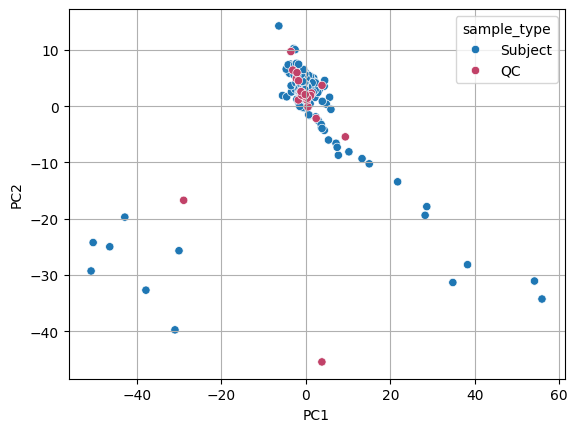

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(results)),index=results.index,columns=["PC1","PC2"])

pca_df["sample_type"] = M['sample_type']


sns.scatterplot(pca_df[pca_df['sample_type'] == 'Subject'],x='PC1',y='PC2',hue='sample_type')
sns.scatterplot(pca_df[pca_df['sample_type'] != 'Subject'],x='PC1',y='PC2',hue='sample_type',palette='flare')
plt.grid(True)